In [40]:
#import statements
import pandas as pd 
import numpy as np 
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)

### Initial Exploratory Data Analyses    
We will analyze the Philadelphia Housing dataset.   
This dataset is a subset of the original dataset found on the City of Philadelphia's website.   
The following exploratory analysis uses the following columns:      
'basements',
 'category_code_description',
 'census_tract',
 'central_air',
 'depth',
 'exterior_condition',
 'fireplaces',
 'frontage',
 'garage_spaces',
 'geographic_ward',
 'interior_condition',
 'market_value',
 'number_of_bathrooms',
 'number_of_bedrooms',
 'number_of_rooms',
 'number_stories',
 'recording_date',
 'sale_date',
 'sale_price',
 'topography',
 'total_area',
 'total_livable_area',
 'type_heater',
 'view_type',
 'year_built',
 'zip_code',
 'lat',
 'lng'

In [78]:
#read in the pickled dataset from the processing script:
infile = open("../processing/housedat.pickle",'rb')
dat = pickle.load(infile)
infile.close()


First, analyze the outcome of interest: **Sale Price**   

In [79]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
dat['sale_price'].describe()

count    503041.00000
mean     120594.27646
std      257550.45623
min           0.00000
25%           1.00000
50%       50000.00000
75%      149900.00000
max     4998000.00000
Name: sale_price, dtype: float64

Note that the max home price is $ 4,998,000 

Output the percentage of houses that have $0 sale price

In [80]:
100 * (dat['sale_price'].eq(0).sum()/dat.shape[0] )

0.15744243510966302

*Note*: 0.16% of the data has a sale_price of $0.

The outcome, 'Sale Price" is extremely right skewed.  
We see this from the below histogram:   

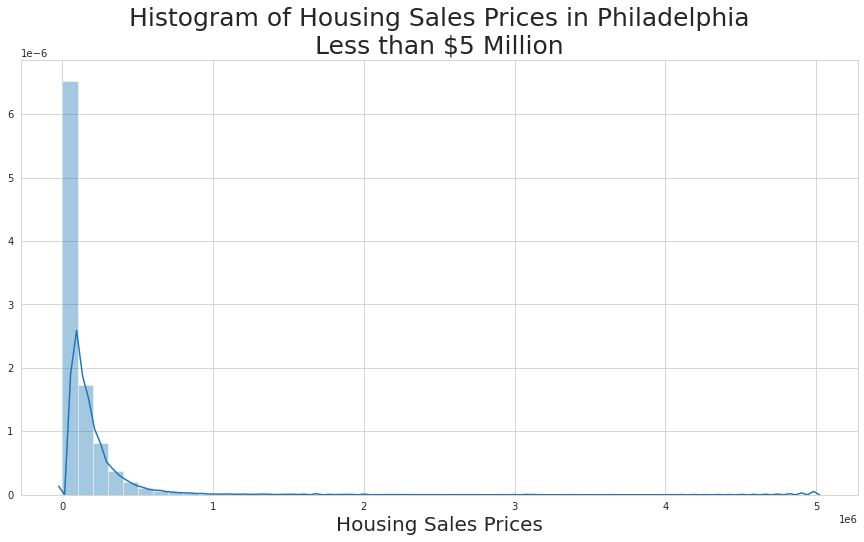

In [81]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.distplot(dat['sale_price'])
plt.title("Histogram of Housing Sales Prices in Philadelphia\nLess than $5 Million", fontsize=25)
plt.xlabel("Housing Sales Prices", fontsize=20)
plt.show()

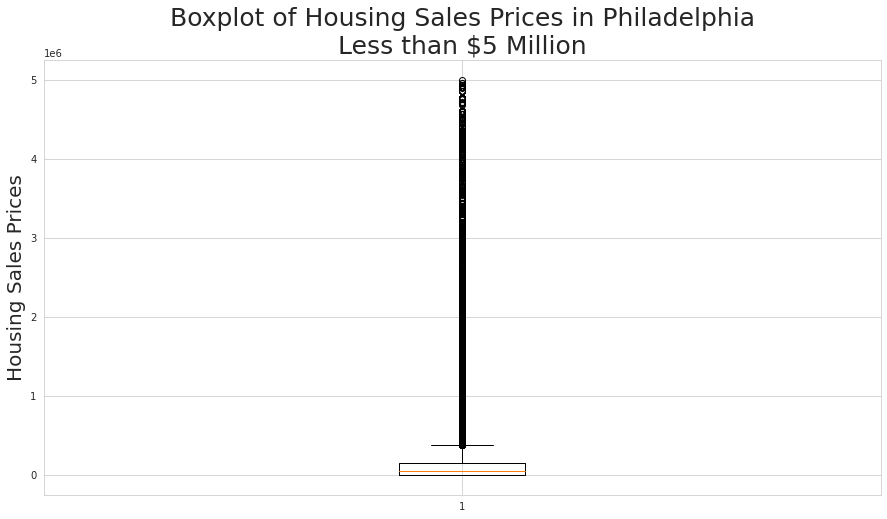

In [82]:
plt.figure(figsize=(15,8))
plt.boxplot(dat['sale_price'])
plt.title("Boxplot of Housing Sales Prices in Philadelphia\nLess than $5 Million", fontsize=25)
plt.ylabel("Housing Sales Prices", fontsize=20)
# show plot
plt.show()

Plot the location of the data and shade points by the Housing Sales Price

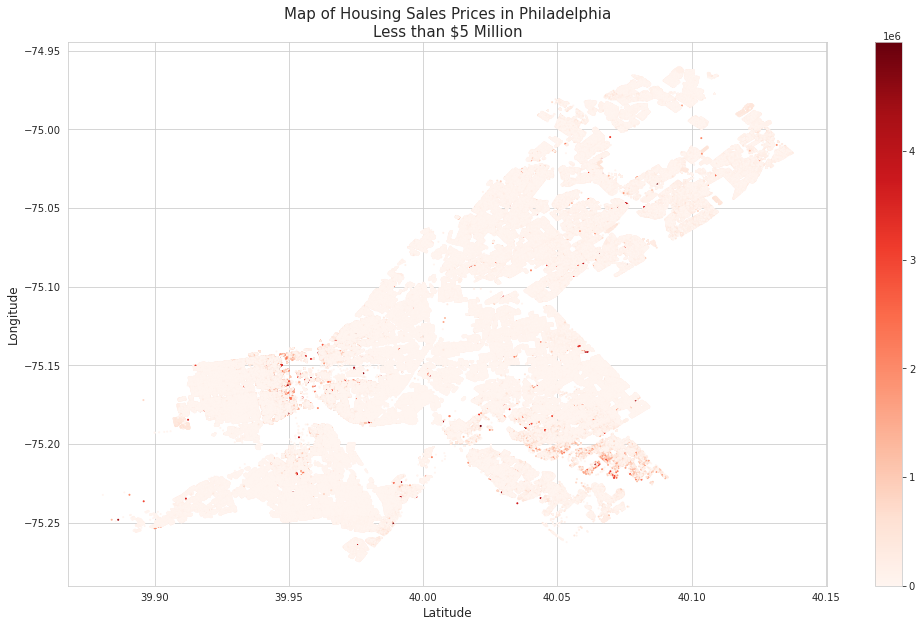

In [83]:
plt.figure(figsize=(17,10))
plt.scatter(x=dat['lng'], y=dat['lat'],
            s=1,
            c = dat['sale_price'],
            cmap="Reds")
plt.colorbar()
plt.title("Map of Housing Sales Prices in Philadelphia\nLess than $5 Million", fontsize=15)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.show()
#color maps: https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html

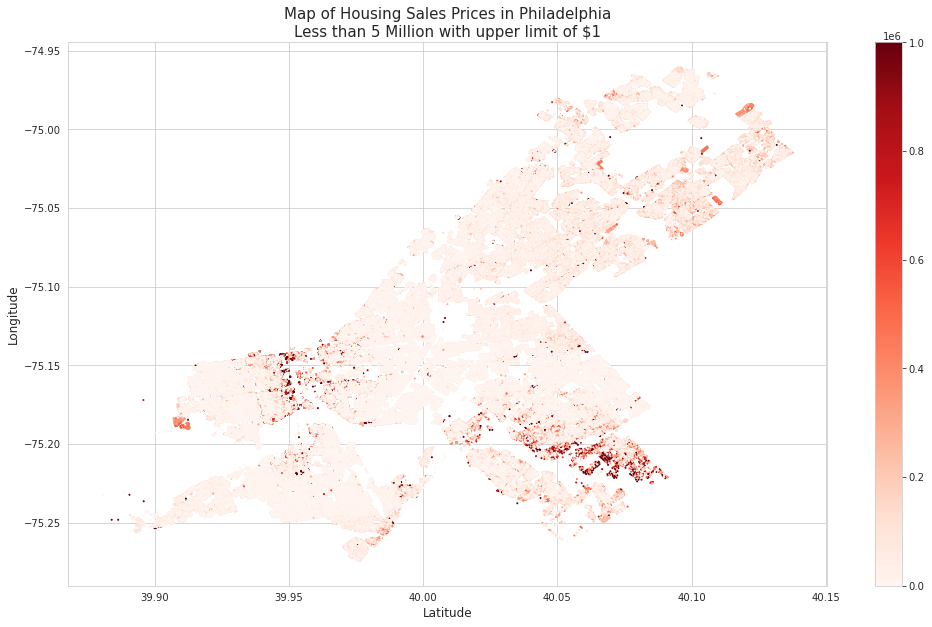

In [84]:
df_maxVal = dat
#set upper limit
maxVal = 1_000_000
df_maxVal['sale_price'] = df_maxVal['sale_price'].where(df_maxVal['sale_price'] <= maxVal, maxVal) 

plt.figure(figsize=(17,10))
plt.scatter(x=df_maxVal['lng'], y=df_maxVal['lat'],
            s=1,
            c = df_maxVal['sale_price'],
            cmap="Reds")
plt.colorbar()
plt.title("Map of Housing Sales Prices in Philadelphia\nLess than 5 Million with upper limit of $1", fontsize=15)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Longitude", fontsize=12)
plt.show()
#color maps: https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html